In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

labels = pd.read_excel("aggregateRockData.xlsx",header=None)[1]
features = pd.read_csv("feature_presence540.txt", delimiter='\s',header=None).iloc[:,2:15]

In [3]:
features.head()

,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,NaN,1,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00
1,1,NaN,2,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05
2,1,NaN,3,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00
3,1,NaN,4,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00
4,1,NaN,5,0.35,0.80,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00


In [4]:
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64

In [7]:
combined_data = pd.concat([labels, features], axis=1)
combined_data[1] = combined_data[1].fillna(0).astype(int)

temp_df = combined_data
temp_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,1,NaN,1,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00
1,1,1,NaN,2,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05
2,1,1,NaN,3,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00
3,1,1,NaN,4,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00
4,1,1,NaN,5,0.35,0.80,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00


In [8]:
df = temp_df.iloc[:480]
len(df)

480

In [9]:
column_names = [
"Rock category number",
"Subtype number",
"Token number",
"Angular fragments",
"Rounded fragments",
"Straight stripes",
"Curved stripes",
"Physical layers",
"Veins",
"Oily/shimmery texture",
"Splotchy texture",
"Single translucent crystal",
"Multiple cubic crystals",
"Sandy texture",
]
df.columns=column_names
df.head()

,Rock category number,Subtype number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
0,1,1,NaN,1,0.20,0.15,0.0,0.0,0.00,0.05,0.0,0.30,0.0,0.00
1,1,1,NaN,2,0.65,0.15,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.05
2,1,1,NaN,3,0.60,0.00,0.0,0.0,0.05,0.00,0.0,0.35,0.0,0.00
3,1,1,NaN,4,0.10,0.85,0.0,0.0,0.05,0.00,0.0,0.10,0.0,0.00
4,1,1,NaN,5,0.35,0.80,0.0,0.0,0.00,0.00,0.0,0.10,0.0,0.00


In [10]:
df.shape
# print(type(df))

(480, 14)

In [11]:
df.describe()

,Rock category number,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,333.000000
mean,2.000000,0.076042,0.097854,0.106458,0.083229,0.121667,0.107083,0.053229,0.056729,0.094745
std,0.817348,0.204845,0.207101,0.179973,0.174690,0.224885,0.187812,0.140626,0.152715,0.155650
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.050000,0.000000,0.050000,0.000000,0.000000,0.000000,0.050000
75%,3.000000,0.050000,0.100000,0.100000,0.100000,0.100000,0.150000,0.000000,0.050000,0.100000
max,3.000000,1.000000,1.000000,0.950000,1.000000,1.000000,0.950000,1.000000,1.000000,0.950000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rock category number        480 non-null    int32  
 1   Subtype number              291 non-null    object 
 2   Token number                399 non-null    object 
 3   Angular fragments           480 non-null    object 
 4   Rounded fragments           480 non-null    object 
 5   Straight stripes            480 non-null    float64
 6   Curved stripes              480 non-null    float64
 7   Physical layers             480 non-null    float64
 8   Veins                       480 non-null    float64
 9   Oily/shimmery texture       480 non-null    float64
 10  Splotchy texture            480 non-null    float64
 11  Single translucent crystal  480 non-null    float64
 12  Multiple cubic crystals     480 non-null    float64
 13  Sandy texture               333 non

In [13]:
df.isnull().sum()

Rock category number            0
Subtype number                189
Token number                   81
Angular fragments               0
Rounded fragments               0
Straight stripes                0
Curved stripes                  0
Physical layers                 0
Veins                           0
Oily/shimmery texture           0
Splotchy texture                0
Single translucent crystal      0
Multiple cubic crystals         0
Sandy texture                 147
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer

numerical_cols = ['Subtype number', 'Token number', 'Sandy texture']

num_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

print(df.isnull().sum())
# df.info()

Rock category number          0
Subtype number                0
Token number                  0
Angular fragments             0
Rounded fragments             0
Straight stripes              0
Curved stripes                0
Physical layers               0
Veins                         0
Oily/shimmery texture         0
Splotchy texture              0
Single translucent crystal    0
Multiple cubic crystals       0
Sandy texture                 0
dtype: int64


In [26]:
# # Handle outliers through capping
# def detect_outliers(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
#     return outliers

# print("\nNumber of outliers:")
# for col in df.select_dtypes(include=[np.number]).columns:  # Select numeric columns only
#     print(f"{col}: {detect_outliers(df, col)}")



Number of outliers:
Rock category number: 0
Subtype number: 69
Token number: 0
Straight stripes: 66
Curved stripes: 68
Physical layers: 58
Veins: 33
Oily/shimmery texture: 62
Splotchy texture: 39
Single translucent crystal: 107
Multiple cubic crystals: 55
Sandy texture: 67


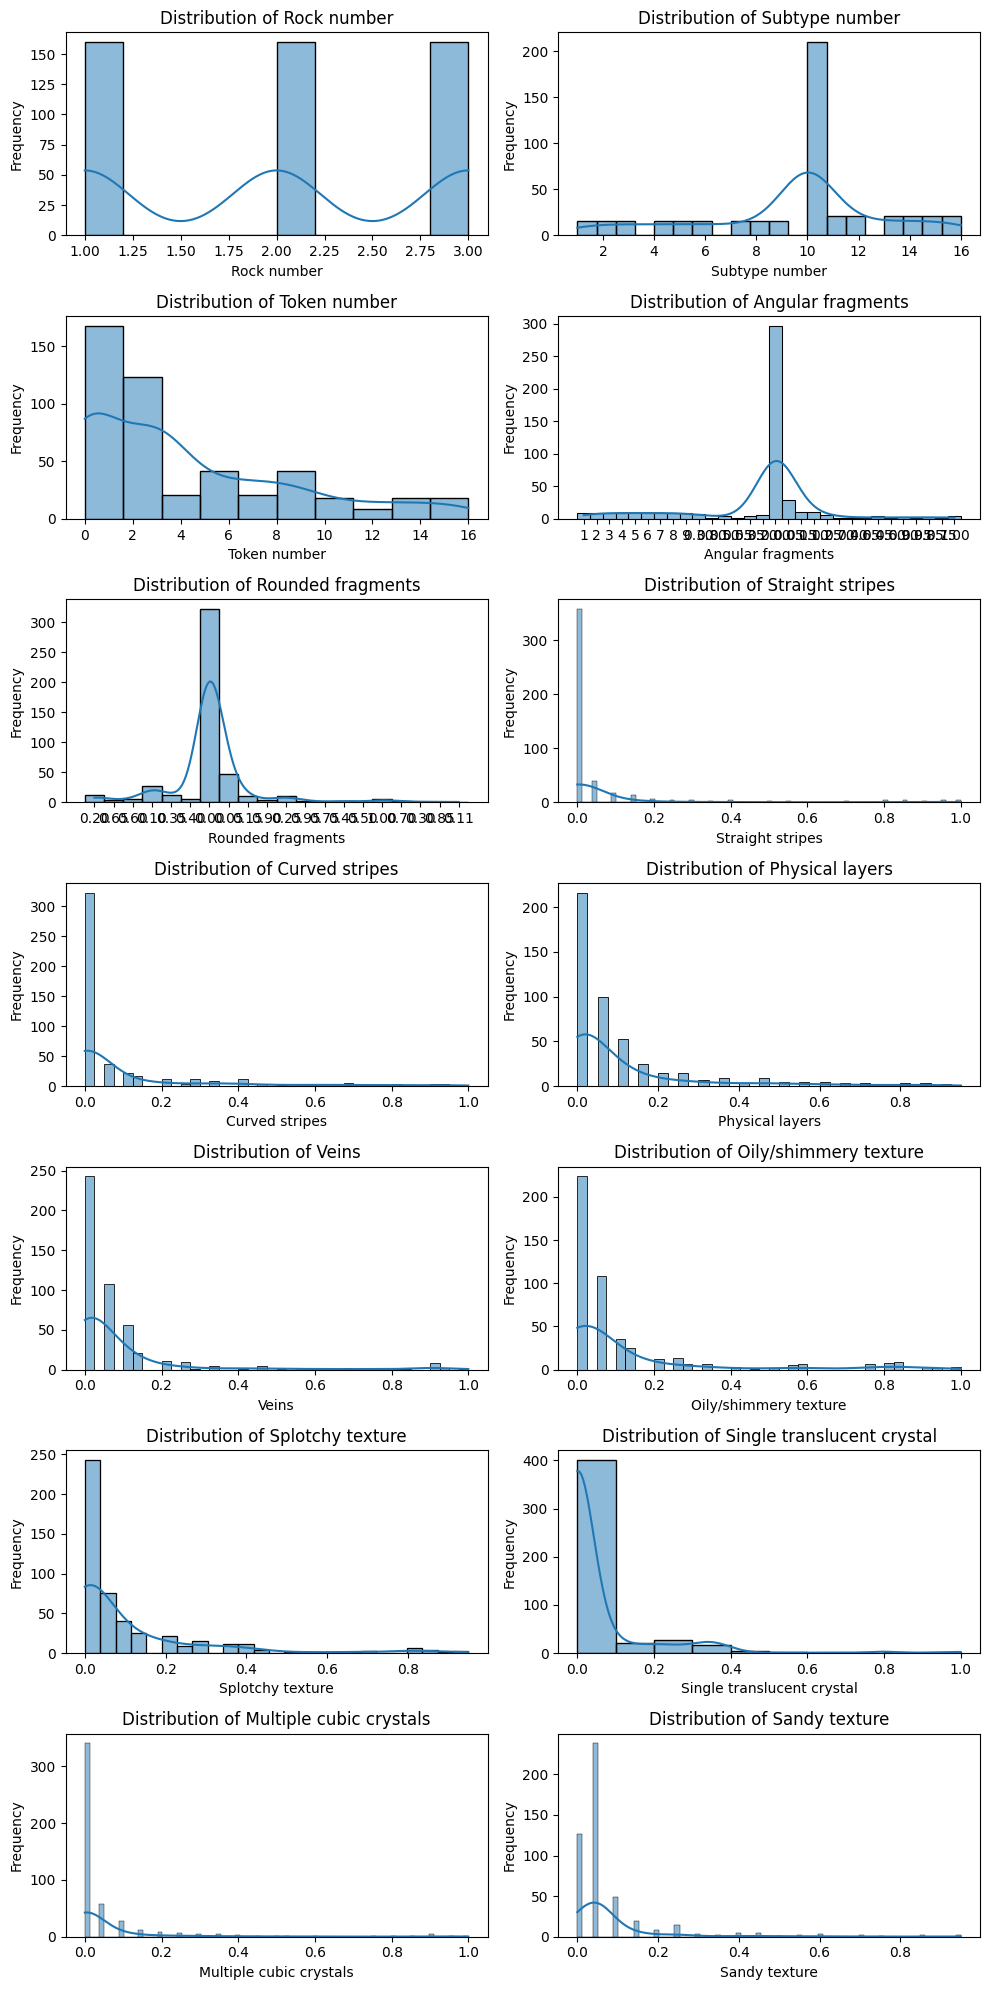

In [126]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(df.columns):
    plt.subplot(7, 2, i+1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

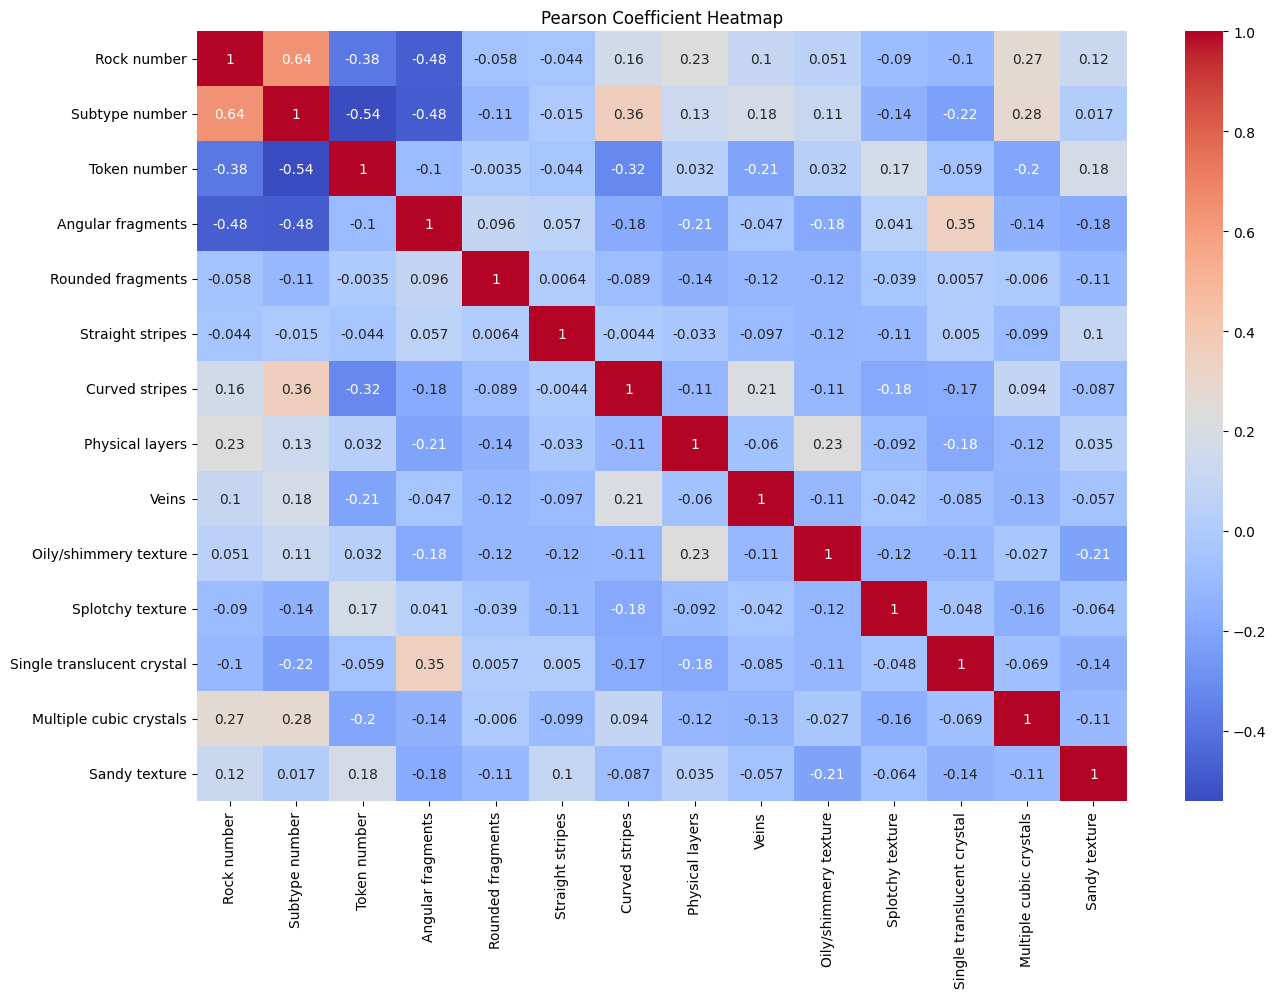

In [108]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot = True, cmap= 'coolwarm' )
plt.title('Pearson Coefficient Heatmap')
plt.show()

In [109]:
df.corr(method='pearson', numeric_only=True)

,Rock number,Subtype number,Token number,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
Rock number,1.000000,0.639756,-0.382174,-0.043642,0.161811,0.232752,0.103812,0.050542,-0.089759,-0.103530,0.269780,0.122632
Subtype number,0.639756,1.000000,-0.541302,-0.014699,0.361680,0.128977,0.176737,0.110364,-0.141426,-0.224164,0.278811,0.017363
Token number,-0.382174,-0.541302,1.000000,-0.044407,-0.320728,0.032307,-0.209545,0.032418,0.173244,-0.059399,-0.204065,0.178203
Straight stripes,-0.043642,-0.014699,-0.044407,1.000000,-0.004388,-0.033310,-0.097158,-0.117414,-0.108586,0.005047,-0.099144,0.100541
Curved stripes,0.161811,0.361680,-0.320728,-0.004388,1.000000,-0.114702,0.207838,-0.111600,-0.183681,-0.171336,0.093866,-0.087042
Physical layers,0.232752,0.128977,0.032307,-0.033310,-0.114702,1.000000,-0.059797,0.229556,-0.092303,-0.181063,-0.119168,0.035031
Veins,0.103812,0.176737,-0.209545,-0.097158,0.207838,-0.059797,1.000000,-0.112691,-0.042027,-0.085111,-0.131651,-0.057388
Oily/shimmery texture,0.050542,0.110364,0.032418,-0.117414,-0.111600,0.229556,-0.112691,1.000000,-0.123135,-0.114607,-0.026928,-0.213858
Splotchy texture,-0.089759,-0.141426,0.173244,-0.108586,-0.183681,-0.092303,-0.042027,-0.123135,1.000000,-0.048098,-0.159288,-0.063792
Single translucent crystal,-0.103530,-0.224164,-0.059399,0.005047,-0.171336,-0.181063,-0.085111,-0.114607,-0.048098,1.000000,-0.069451,-0.144320


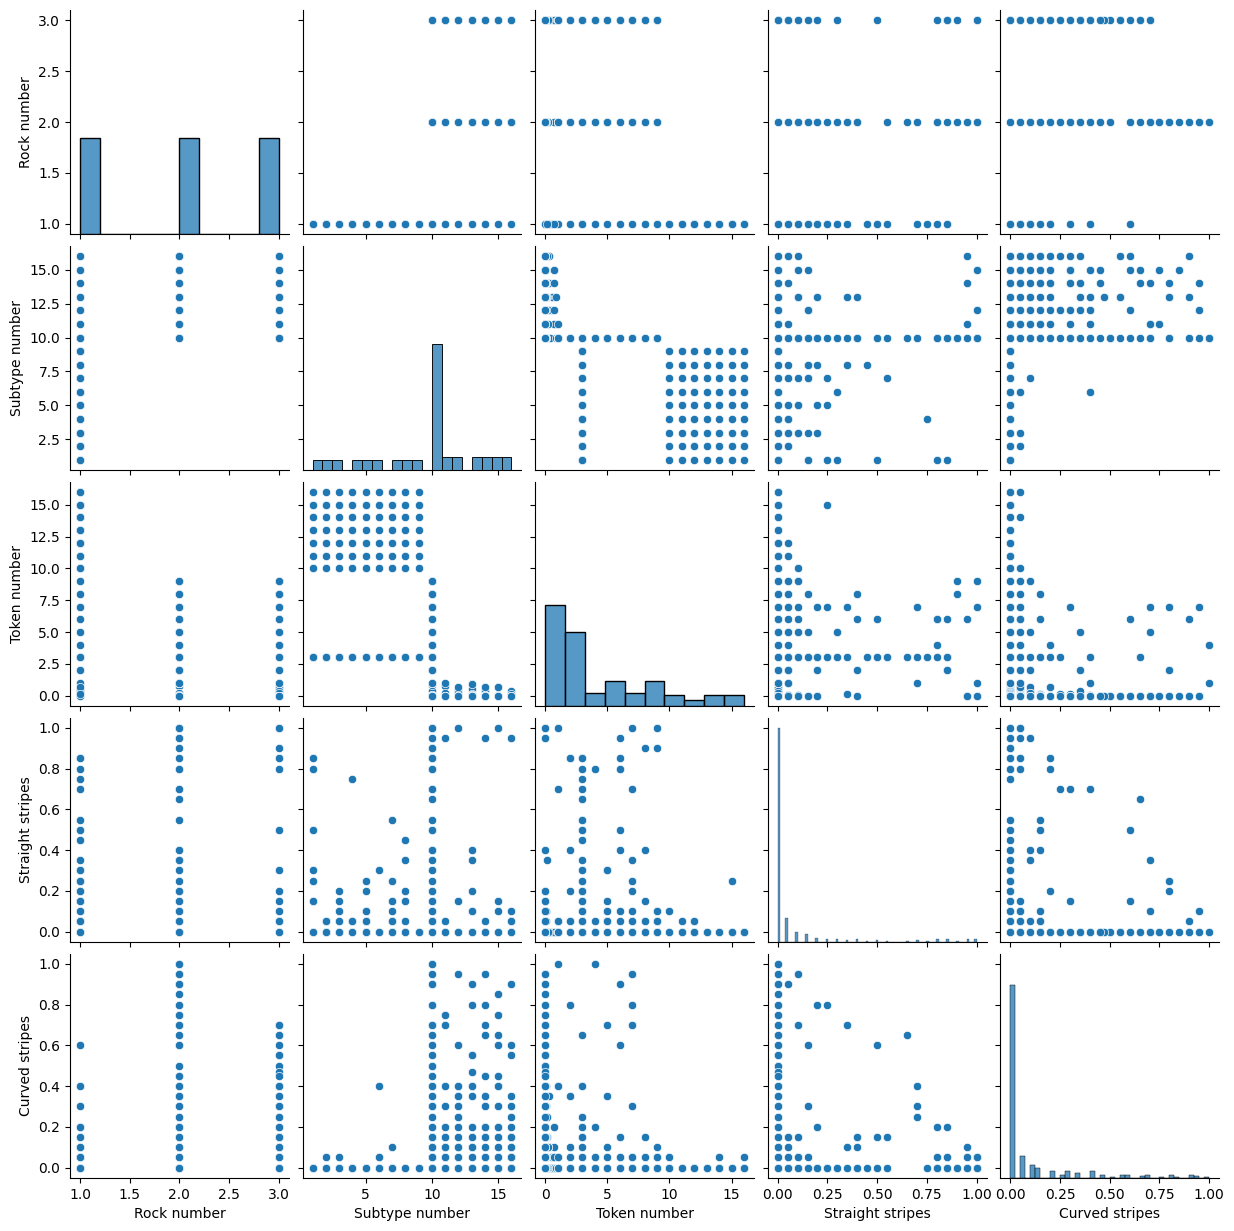

In [110]:
sns.pairplot(df[[
    "Rock category number", "Subtype number", "Token number", "Angular fragments", 
    "Rounded fragments", "Straight stripes", "Curved stripes"
]])
plt.show()

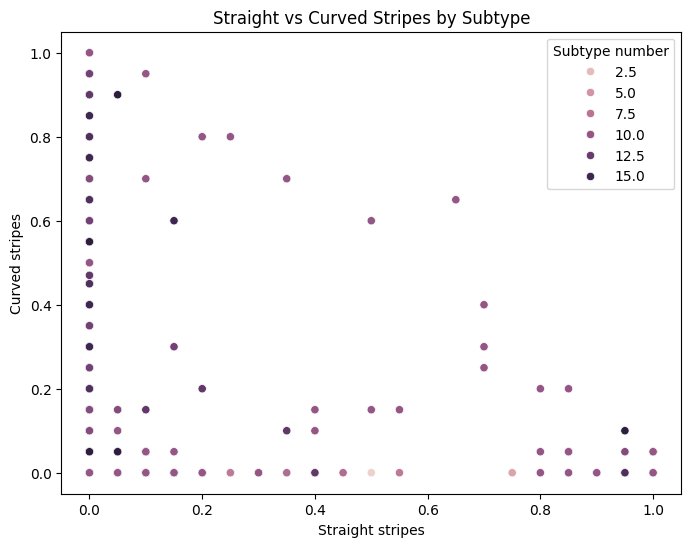

In [127]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Straight stripes", y="Curved stripes", hue="Subtype number")
plt.title("Straight vs Curved Stripes by Subtype")
plt.show()

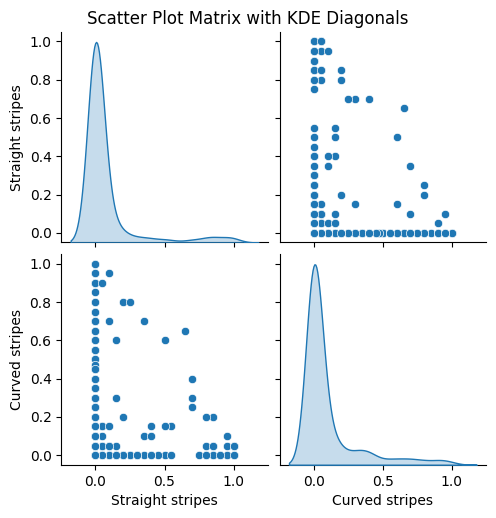

In [96]:
g = sns.pairplot(df[[
    "Angular fragments", "Rounded fragments", "Straight stripes", "Curved stripes"
]], diag_kind="kde")
plt.suptitle("Scatter Plot Matrix with KDE Diagonals", y=1.02)
plt.show()

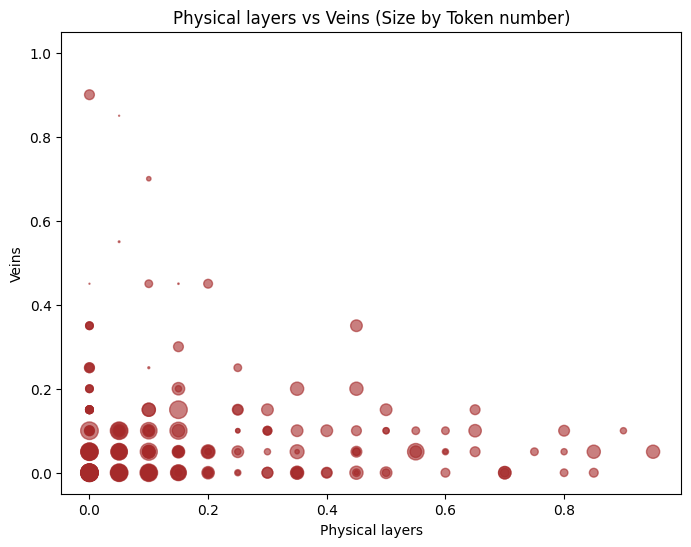

In [129]:
x = df["Physical layers"]
y = df["Veins"]

size_data = df["Token number"].fillna(df["Token number"].median()).astype(float) * 10

if len(x) == len(y) == len(size_data):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, s=size_data, alpha=0.6, c="brown")
    plt.xlabel("Physical layers")
    plt.ylabel("Veins")
    plt.title("Physical layers vs Veins (Size by Token number)")
    plt.show()


In [133]:
# Split based on the 'Token number'
df_train = df[df['Token number'].between(1, 10)]
df_validation = df[df['Token number'].between(11, 13)]
df_test= df[df['Token number'].between(14, 16)]

df_train = df_train.drop('Token number', axis=1)
df_validation = df_validation.drop('Token number', axis=1)
df_test = df_test.drop('Token number', axis=1)

print(df_train.shape)
print(df_validation.shape)
print(df_test.shape)

full_df = df
full_df= full_df.drop('Token number', axis=1)
X_train, Y_train= df_train.drop('Rock category number', axis=1) , df_train['Rock category number']
X_val, Y_val = df_validation.drop('Rock category number', axis=1), df_validation['Rock category number']
X_test, Y_test= df_test.drop('Rock category number', axis=1) , df_test['Rock category number']
X_full, Y_full = full_df.drop('Rock category number', axis=1) , full_df['Rock category number']
print(full_df.shape)

(280, 13)
(27, 13)
(27, 13)
(480, 13)


In [138]:
print(Y_train.value_counts())
print(Y_val.value_counts())
print(Y_test.value_counts())

Rock number
1    99
3    91
2    90
Name: count, dtype: int64
Rock number
1    27
Name: count, dtype: int64
Rock number
1    27
Name: count, dtype: int64


In [139]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Overall set : {df.shape[0]} samples")

Training set: 280 samples
Validation set: 27 samples
Testing set: 27 samples
Overall set : 480 samples


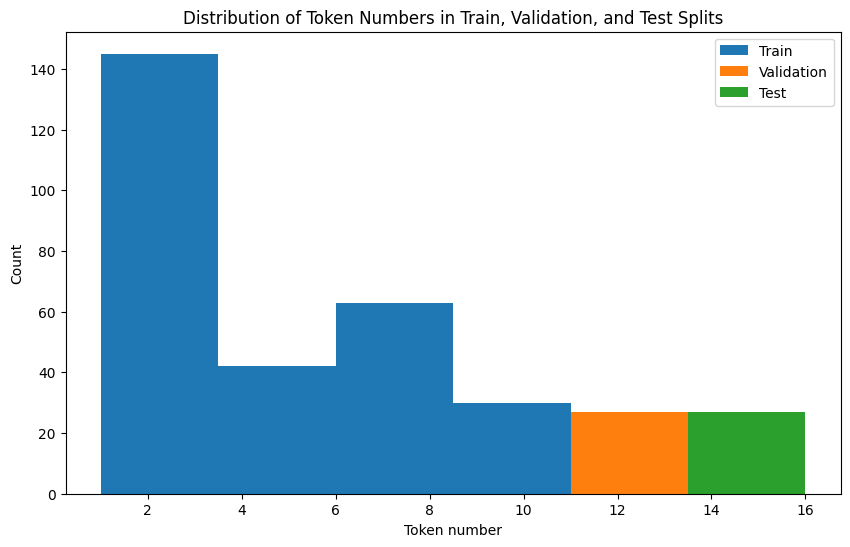

In [142]:
import matplotlib.pyplot as plt

df_train['Split'] = 'Train'
df_validation['Split'] = 'Validation'
df_test['Split'] = 'Test'

df_split = pd.concat([df_train, df_validation, df_test])

plt.figure(figsize=(10, 6))
plt.hist([df[df['Token number'].between(1, 10)]['Token number'],
          df[df['Token number'].between(11, 13)]['Token number'],
          df[df['Token number'].between(14, 16)]['Token number']],
         label=['Train', 'Validation', 'Test'], bins=6, stacked=True)

plt.xlabel('Token number')
plt.ylabel('Count')
plt.title('Distribution of Token Numbers in Train, Validation, and Test Splits')
plt.legend()
plt.show()


In [ ]:
features_column_names=df.columns.values.tolist()
for i in features_column_names:
    print(correlation_matrix[i].sort_values(ascending=False))

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_val = pd.DataFrame(scaler.transform(X_val))
X_test = pd.DataFrame(scaler.transform(X_test))

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
# Ignoring specific warning by category
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, accuracy_score,f1_score, recall_score

clf = LogisticRegression(multi_class='multinomial')

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 500]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("best param:",best_params)

best_clf = LogisticRegression(multi_class='multinomial', C=best_params['C'],
solver=best_params['solver'],max_iter=best_params['max_iter'])
best_clf.fit(X_train, Y_train)

def evaluate_model(model, X, y, set_name):
    y_pred_log = model.predict(X)
    accuracy_log = accuracy_score(y, y_pred_log)
    precision_log = precision_score(y, y_pred_log, average='weighted')
    recall_log = recall_score(y, y_pred_log, average='weighted')
    f1_log = f1_score(y, y_pred_log, average='weighted')
    print(f"{set_name} Metrics:")
    print(f"Accuracy: {accuracy_log}")
    print(f"Precision: {precision_log}")
    print(f"Recall: {recall_log}")
    print(f"F1 Score: {f1_log}")
# Evaluating the model on the validation and test sets
evaluate_model(best_clf, X_train, Y_train, "Train")
evaluate_model(best_clf, X_val, Y_val, "Validation")
evaluate_model(best_clf, X_test, Y_test, "Test")

best param: {'C': 11.288378916846883, 'max_iter': 50, 'solver': 'lbfgs'}
/nTrain Metrics:
Accuracy: 0.8285714285714286
Precision: 0.8369121561668146
Recall: 0.8285714285714286
F1 Score: 0.8316064887493457
/nValidation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
/nTest Metrics:
Accuracy: 0.9629629629629629
Precision: 1.0
Recall: 0.9629629629629629
F1 Score: 0.9811320754716981


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
# Create an SVM classifier
svm_clf = SVC()
# Define hyperparameters and their ranges for exploration
param_grid = {
'C': [0.1, 1, 10], # Regularization parameter
'kernel': ['linear', 'poly', 'rbf' , 'sigmoid'], # Kernels to explore
'degree': [1, 2, 3, 4], # Degree of polynomial kernel (if␣applicable)
'gamma': [ 0.1, 1, 2],
'coef0': [1,10,100]# Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}
# Perform grid search with cross-validation (adjust cv as needed)
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid,cv=10,scoring='accuracy')
# Fit the grid search to your training data
grid_search.fit(X_train, Y_train)
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("best parameters:", best_params, grid_search.best_score_)
# Train the SVM classifier with the best hyperparameters
best_svm_clf = SVC(**best_params)
best_svm_clf.fit(X_train, Y_train)
#print("best parameters:", best_svm_clf)
# Function to evaluate the model and print metrics
def evaluate_model(model, X, y, set_name):
    y_pred_svm = model.predict(X)
    accuracy_svm = accuracy_score(y, y_pred_svm)
    precision_svm = precision_score(y, y_pred_svm, average='weighted')
    recall_svm = recall_score(y, y_pred_svm, average='weighted')
    f1_svm = f1_score(y, y_pred_svm, average='weighted')
    print(f"{set_name} Metrics:")
    print(f"Accuracy: {accuracy_svm}")
    print(f"Precision: {precision_svm}")
    print(f"Recall: {recall_svm}")
    print(f"F1 Score: {f1_svm}")
# Evaluate the model on the validation and test sets
evaluate_model(best_svm_clf, X_train, Y_train, "Train")

best parameters: {'C': 0.1, 'coef0': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'} 0.75
Train Metrics:
Accuracy: 0.8321428571428572
Precision: 0.8405
Recall: 0.8321428571428572
F1 Score: 0.8349957260391067


In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
# Create a Random Forest classifier
rf_clf = RandomForestClassifier()
# Define hyperparameters and their ranges for exploration
param_grid = {
'n_estimators': [100, 150, 175], # Increase the number of trees
'max_depth': [10, 12, 13], # Moderate max depth
'min_samples_split': [5, 7, 10], # Moderate minimum samples to split
'min_samples_leaf': [8, 10, 12] # Adjust min samples at leaf to control overfitting
}
# Perform grid search with cross-validation (adjust cv as needed)
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid,cv=5,scoring='accuracy', n_jobs = -1, verbose = 2)
# Fit the grid search to your training data
grid_search.fit(X_train, Y_train)
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("best param:",best_params)
# Train the Random Forest classifier with the best hyperparameters
best_rf_clf = RandomForestClassifier(**best_params)
best_rf_clf.fit(X_train, Y_train)
print(best_rf_clf)
# Function to evaluate the model and print metrics
def evaluate_model(model, X, y, set_name):
    y_pred_rf = model.predict(X)
    accuracy_rf = accuracy_score(y, y_pred_rf)
    precision_rf = precision_score(y, y_pred_rf, average='weighted')
    recall_rf = recall_score(y, y_pred_rf, average='weighted')
    f1_rf = f1_score(y, y_pred_rf, average='weighted')
    print(f"{set_name} Metrics:")
    print(f"Accuracy: {accuracy_rf}")
    print(f"Precision: {precision_rf}")
    print(f"Recall: {recall_rf}")
    print(f"F1 Score: {f1_rf}")
    print("-------------------------")
# Evaluate the model on the validation and test sets
evaluate_model(best_rf_clf, X_train, Y_train, "Train")
evaluate_model(best_rf_clf, X_val, Y_val, "Validation")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
best param: {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 7, 'n_estimators': 100}
RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=7)
Train Metrics:
Accuracy: 0.875
Precision: 0.8811688311688312
Recall: 0.875
F1 Score: 0.8767006802721089
-------------------------
Validation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
-------------------------
